LOAD LIBRARY

In [1]:
import numpy as np # untuk komputasi numerik
import pandas as pd # data processing, CSV file
import seaborn as sns #visualisasi
import matplotlib.pyplot as plt # visualisasi
import plotly.express as px # visualisasi
from sklearn.model_selection import train_test_split # untuk membagi dataset menjadi subset pelatihan dan pengujian
from sklearn.linear_model import LinearRegression # untuk membangun model regresi linear
from sklearn.metrics import r2_score #untuk menghitung koefisien determinasi (R-squared) antara nilai prediksi dan nilai sebenarnya dari suatu model regresi

LOAD DATASET

In [2]:
#nama dataframe kita adalah df yang berisi data insurance.csv

df = pd.read_csv('insurance.csv')

SNEAK PEAK DATA

In [3]:
#Melihat 5 baris teratas dari data kita

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Mengetahui jumlah kolom dan baris  dari data kita
#disini diketahui bahwa terdapat 7 kolom dan 1338 baris

df.shape

(1338, 7)

In [5]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memori yang digunakan dan lain lain.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Melihat statical deskripsi mulai dari banyaknya data, rata rata, standar deviasi, kuartil dan lain lain

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Handling Missing Values

In [7]:
# Mencari dan menangani data missing values
# Ternyata data kita tidak ada yang missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
# Seperti yang telah diketahui data dari fitur sex, smoker dan region berupa kategorikal,
# Maka perlu melakukan konversi data kategorikal ke data numerik agar dapat diolah

# kita ganti untuk kolom sex atau jenis kelamin terdiri dari female dan male. untuk female = 0 dan male =1
df.replace({'sex': {'female': 0, 'male': 1}}, inplace=True)
# kita ganti juga kolom smoker atau perokok terdiri dari no dan yes, untuk no=0 dan yes=1
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
# kita ganti lagi kolom region atau wilayah terdiri dari 4 wilayah ganti dengan northeast :0, southeast :1, southwest :2, northwest :3
df.replace({'region': {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest':3}}, inplace=True)
df # kemudian kita tampilkan datanya

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


VISUALISASI

In [34]:
#visualisasi data pie chart dari distribusi jenis kelamin
plt.figure(figsize=(10,6))
plt = px.pie(df['sex'].value_counts().reset_index(), values='sex', names='index')
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.update_layout(
    title_text="Sex Distribution ")
plt.show()

<Figure size 1000x600 with 0 Axes>

In [38]:
#visualisasi data pie chart dari distribusi wilayah
plt = px.pie(df['region'].value_counts().reset_index(), values='region', names='index')
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.update_layout(
    title_text="Region Distribution")
plt.show()

In [36]:
#visualisasi data pie chart dari distribusi Perokok, dari yang merokok dan tidak merokok
plt = px.pie(df['smoker'].value_counts().reset_index(), values='smoker', names='index')
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.update_layout(
    title_text="Distribution of Smokers or Non-Smokers")
plt.show()

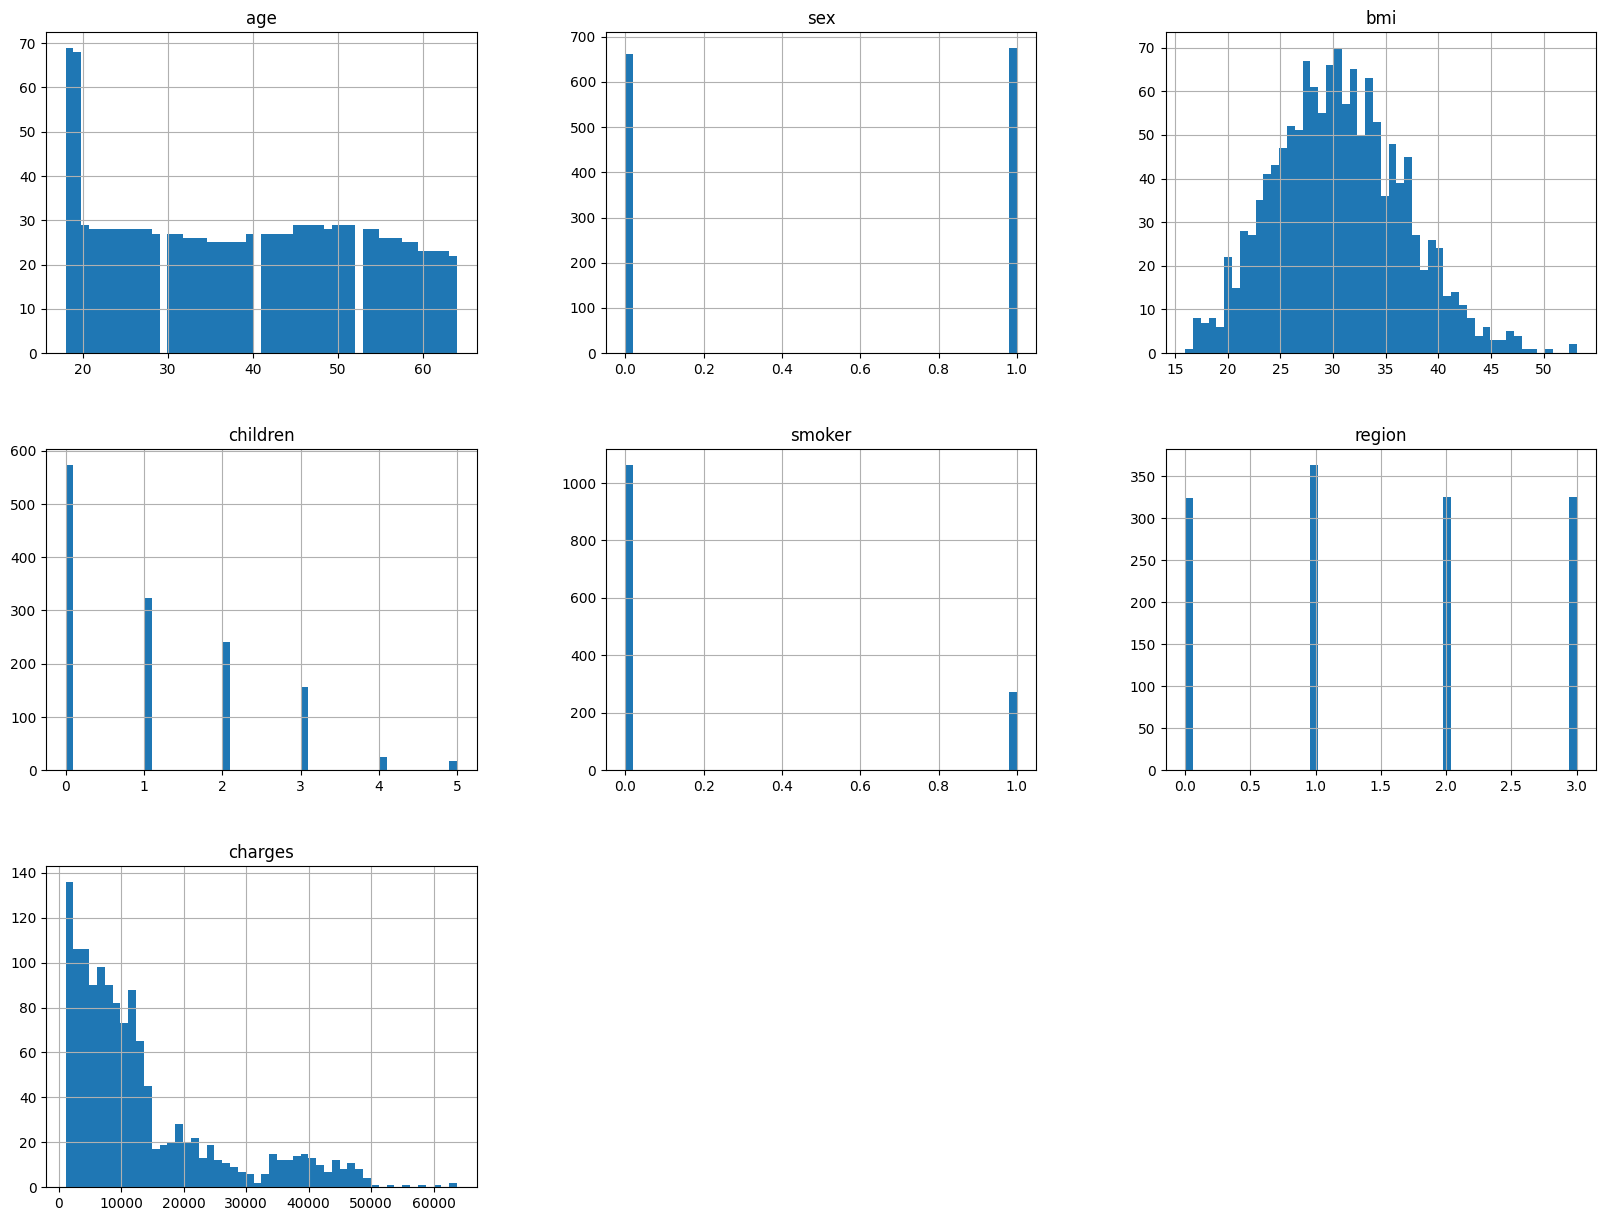

In [39]:
#visualisasi data histogram
#Histogram adalah jenis visualisasi data untuk merepresentasikan distribusi frekuensi dari dataset numerik
df.hist(bins=50, figsize=(20,15))
plt.show()

Jika dilihat pada fitur `charges` atau lebih tepatnya label atau target, datanya distribusi condong kekanan (right-skewed).

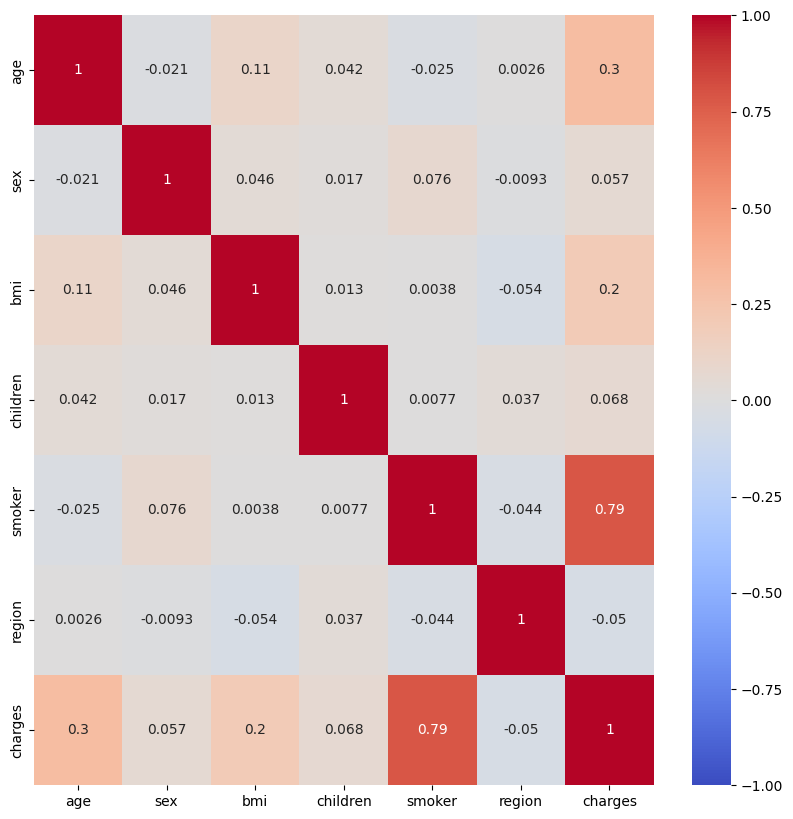

In [13]:
# Menggunakan fungsi yang telah disediakan oleh seaborn untuk melihat korelasi antar variabel atau fitur.
# Lebih tepatnya mengecek korelasi fitur terdahap label atau target.

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

In [14]:
# Preparing data for machine learning by separating input features and target variable
x = df[['age','sex','bmi','children', 'smoker','region']]
y = df[['charges']]
x.columns = ['age','sex','bmi','children', 'smoker','region']

In [15]:
# Split 20% with test_size=0.2


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.columns = ['age','sex','bmi','children', 'smoker','region']
X_test.columns = ['age','sex','bmi','children', 'smoker','region']
print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1338, 6) (1338, 1)
(1070, 6) (1070, 1)
(268, 6) (268, 1)


In [16]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,2


In [17]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [18]:
lin_reg =LinearRegression()
#bikin objek lin reg

In [19]:
lin_reg.fit(X_train, y_train)


LinearRegression()

In [20]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[  254.84728952   -25.93429886   319.85165066   432.29014099
  23580.78241809   -62.42291896]]
[-11776.36823909]


In [21]:
pred=lin_reg.predict(X_test)

In [22]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7980619120055225


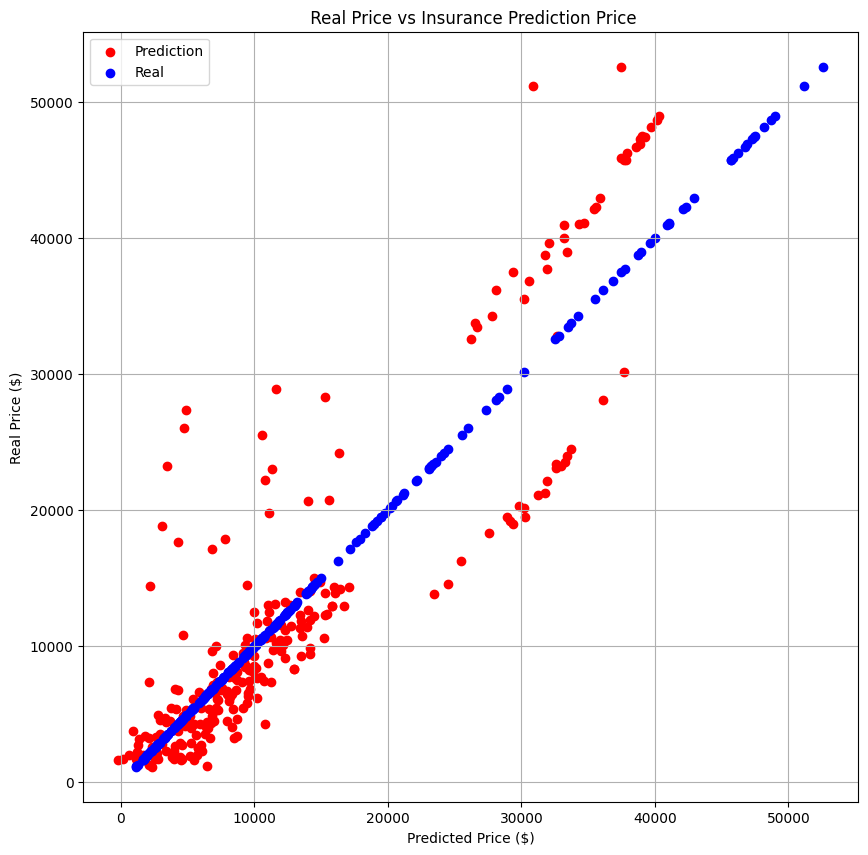

In [23]:
# Comparison Between Real Insurance Price and Prediction Price
y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, c='red', label='Prediction')
plt.scatter(y_test, y_test, c='blue', label='Real')
plt.title(' Real Price vs Insurance Prediction Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Real Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
data={'age' :19,'sex':0 ,'bmi':28.9 ,'children': 0, 'smoker':0 ,'region':2
}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,19,0,28.9,0,0,2


In [25]:
cost_pred = lin_reg.predict(cust_df)
print(" Biaya asuransi kesehatan sebesar :", cost_pred)

 Biaya asuransi kesehatan sebesar : [[2184.59712792]]


In [26]:
data={'age' :40,'sex':0 ,'bmi':36.19 ,'children': 0, 'smoker':0 ,'region':1
}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,40,0,36.19,0,0,1


In [27]:
cost_pred = lin_reg.predict(cust_df)
print(" Biaya asuransi kesehatan sebesar :", cost_pred)

 Biaya asuransi kesehatan sebesar : [[9930.53166004]]


In [28]:
data={'age' :22,'sex':0 ,'bmi':39.805 ,'children': 0, 'smoker':0 ,'region':0
}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,22,0,39.805,0,0,0


In [29]:
cost_pred = lin_reg.predict(cust_df)
print(" Biaya asuransi kesehatan sebesar :", cost_pred)

 Biaya asuransi kesehatan sebesar : [[6561.96708485]]


In [30]:
data={'age' :43,'sex':0 ,'bmi':25.27 ,'children': 1, 'smoker':1 ,'region':0
}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,43,0,25.27,1,1,0


In [31]:
cost_pred = lin_reg.predict(cust_df)
print(" Biaya asuransi kesehatan sebesar :", cost_pred)

 Biaya asuransi kesehatan sebesar : [[31277.78898141]]
